In [1]:
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', sep=';')

In [2]:
result = data['y']
data.drop(['y'] ,axis=1, inplace=True)
result = result.map(lambda x: 1 if x == 'yes' else 0)
result.value_counts()

data['pdays'] = data['pdays'].map(lambda x: 0 if x == 999 else x)

pd.options.mode.chained_assignment = None
data['age'][1000:2000] = None
data['duration'][2000:3000] = None
data['pdays'][3000:4000] = None
data['previous'][4000:5000] = None
data['emp.var.rate'][10000:11000] = None
data['cons.price.idx'][20000:21000] = None
data['cons.conf.idx'][30000:31000] = None
data['euribor3m'][39000:40000] = None
data['nr.employed'][40000:41000] = None

#mean
data['age'][1000:2000] = data['age'].mean()
data['duration'][2000:3000] = data['duration'].mean()
data['pdays'][3000:4000] = data['pdays'].mean()
data['previous'][4000:5000] = data['previous'].mean()
data['emp.var.rate'][10000:11000] = data['emp.var.rate'].mean()
data['cons.price.idx'][20000:21000] = data['cons.price.idx'].mean()
data['cons.conf.idx'][30000:31000] = data['cons.conf.idx'].mean()
data['euribor3m'][39000:40000] = data['euribor3m'].mean()
data['nr.employed'][40000:41000] = data['nr.employed'].mean()

In [3]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder()

#create dummy variables for job
enc_df = pd.DataFrame(enc.fit_transform(data[['job']]).toarray())

enc_df.columns = enc.get_feature_names(['job'])

data.drop(['job'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for marital
enc_df = pd.DataFrame(enc.fit_transform(data[['marital']]).toarray())

enc_df.columns = enc.get_feature_names(['marital'])

data.drop(['marital'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for education
enc_df = pd.DataFrame(enc.fit_transform(data[['education']]).toarray())

enc_df.columns = enc.get_feature_names(['eductation'])

data.drop(['education'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for default
enc_df = pd.DataFrame(enc.fit_transform(data[['default']]).toarray())

enc_df.columns = enc.get_feature_names(['default'])

data.drop(['default'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for housing
enc_df = pd.DataFrame(enc.fit_transform(data[['housing']]).toarray())

enc_df.columns = enc.get_feature_names(['housing'])

data.drop(['housing'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for loan
enc_df = pd.DataFrame(enc.fit_transform(data[['loan']]).toarray())

enc_df.columns = enc.get_feature_names(['loan'])

data.drop(['loan'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for contact
enc_df = pd.DataFrame(enc.fit_transform(data[['contact']]).toarray())

enc_df.columns = enc.get_feature_names(['contact'])

data.drop(['contact'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

#create dummy variables for month
enc_df = pd.DataFrame(enc.fit_transform(data[['month']]).toarray())

enc_df.columns = enc.get_feature_names(['month'])

data.drop(['month'] ,axis=1, inplace=True)

# data = pd.concat([data, enc_df ], axis=1)
# usuwamy

#create dummy variables for day_of_week
enc_df = pd.DataFrame(enc.fit_transform(data[['day_of_week']]).toarray())

enc_df.columns = enc.get_feature_names(['day_of_week'])

data.drop(['day_of_week'] ,axis=1, inplace=True)

# data = pd.concat([data, enc_df ], axis=1
# usuwamy

#create dummy variables for day_of_week
enc_df = pd.DataFrame(enc.fit_transform(data[['poutcome']]).toarray())

enc_df.columns = enc.get_feature_names(['poutcome'])

data.drop(['poutcome'] ,axis=1, inplace=True)

data = pd.concat([data, enc_df ], axis=1)

/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/si

In [4]:
data.drop(['loan_no'] ,axis=1, inplace=True)
data.drop(['loan_yes'] ,axis=1, inplace=True)
data.drop(['cons.conf.idx'] ,axis=1, inplace=True)
data.drop(['eductation_unknown'] ,axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

dataset_scaled = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, result, test_size = 0.30, stratify=result)

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [7]:
from sklearn.model_selection import StratifiedKFold

X = dataset_scaled
y = result

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
skf.get_n_splits(X, y)

print(skf)

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Do grid searcha zostały wybrane modele z najbardziej obiecującymi wynikami


## SVC oversampling

In [9]:
from sklearn.metrics import f1_score, make_scorer, recall_score
f1 = make_scorer(f1_score, average='binary')
recall = make_scorer(recall_score, average='binary')

Accuracy score: 0.86
F1 score: 0.56
Recall score: 0.82


/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


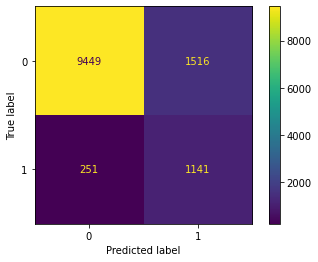

In [10]:
clf_svc_o = SVC(gamma='auto', class_weight='balanced', probability=True)
clf_svc_o.fit(X_train_over, y_train_over)

y_pred = clf_svc_o.predict(X_test)

acc_sc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f' % acc_sc)

f1_sc = f1_score(y_test, y_pred, average='binary')
print('F1 score: %.2f' % f1_sc)

recall_sc = recall_score(y_test, y_pred, average='binary')
print('Recall score: %.2f' % recall_sc)

plot_confusion_matrix(clf_svc_o, X_test, y_test)  
plt.show()

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.9262746445203188
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     10965
           1       0.45      0.71      0.55      1392

    accuracy                           0.87     12357
   macro avg       0.71      0.80      0.74     12357
weighted avg       0.90      0.87      0.88     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


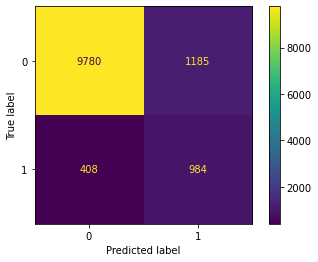

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1, 10], 'kernel': ('linear', 'rbf'), 'gamma':('scale', 'auto')}
svc = SVC()
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring=f1, n_jobs = -1)
clf.fit(X_train_over, y_train_over)

print(clf.best_params_)
print(clf.best_score_)

best_clf_svc = clf.best_estimator_
grid_predictions = best_clf_svc.predict(X_test)   
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_svc, X_test, y_test)
plt.show()

### Decision Tree oversampling

Accuracy score: 0.88
F1 score: 0.51
Recall score: 0.55


/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


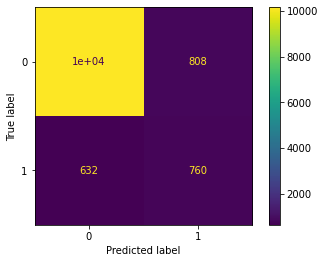

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_dt_o = DecisionTreeClassifier(random_state=0, criterion='gini')
clf_dt_o.fit(X_train_over, y_train_over)

y_pred = clf_dt_o.predict(X_test)

acc_sc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f' % acc_sc)

f1_sc = f1_score(y_test, y_pred, average='binary')
print('F1 score: %.2f' % f1_sc)

recall_sc = recall_score(y_test, y_pred, average='binary')
print('Recall score: %.2f' % recall_sc)

plot_confusion_matrix(clf_dt_o, X_test, y_test)  
plt.show()

{'criterion': 'entropy', 'splitter': 'random'}
0.9267634309521844
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10965
           1       0.48      0.56      0.52      1392

    accuracy                           0.88     12357
   macro avg       0.71      0.74      0.72     12357
weighted avg       0.89      0.88      0.89     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


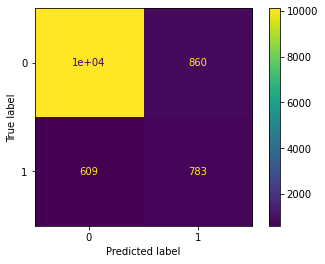

In [13]:
parameters = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random')}
dt = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dt, param_grid=parameters, scoring=f1, n_jobs = -1)
clf.fit(X_train_over, y_train_over)

print(clf.best_params_)
print(clf.best_score_)

best_clf_df = clf.best_estimator_
grid_predictions = best_clf_df.predict(X_test)    
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_df, X_test, y_test)
plt.show()

### Logistic Regression

Accuracy score: 0.86
F1 score: 0.58
Recall score: 0.86


/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


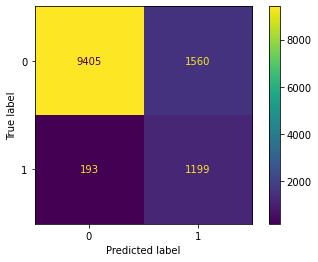

In [14]:
from sklearn.linear_model import LogisticRegression

clf_lr_o = LogisticRegression(random_state=0)
clf_lr_o.fit(X_train_over, y_train_over)

y_pred = clf_lr_o.predict(X_test)

acc_sc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f' % acc_sc)

f1_sc = f1_score(y_test, y_pred, average='binary')
print('F1 score: %.2f' % f1_sc)

recall_sc = recall_score(y_test, y_pred, average='binary')
print('Recall score: %.2f' % recall_sc)

plot_confusion_matrix(clf_lr_o, X_test, y_test)  
plt.show()

{'C': 1, 'penalty': 'none'}
0.868398189582771
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     10965
           1       0.43      0.86      0.58      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.86      0.88     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


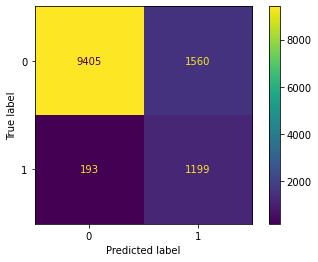

In [15]:
parameters = {'penalty': ('l2', 'none'), 'C': [1, 10]}
lr = LogisticRegression()
clf = GridSearchCV(estimator=lr, param_grid=parameters, scoring='f1', n_jobs = -1)
clf.fit(X_train_over, y_train_over)

print(clf.best_params_)
print(clf.best_score_)

best_clf_lr = clf.best_estimator_
grid_predictions = best_clf_lr.predict(X_test)    
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_lr, X_test, y_test)
plt.show()

Accuracy score: 0.85
F1 score: 0.58
Recall score: 0.92


/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


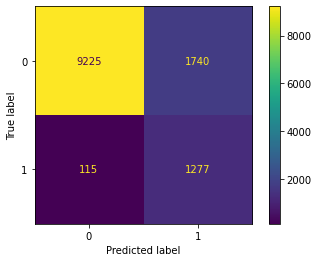

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf_rand_forest = RandomForestClassifier(random_state=0)
clf_rand_forest.fit(X_train_under, y_train_under)

y_pred = clf_rand_forest.predict(X_test)

acc_sc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f' % acc_sc)

f1_sc = f1_score(y_test, y_pred, average='binary')
print('F1 score: %.2f' % f1_sc)

recall_sc = recall_score(y_test, y_pred, average='binary')
print('Recall score: %.2f' % recall_sc)

plot_confusion_matrix(clf_rand_forest, X_test, y_test)  
plt.show()

{'criterion': 'entropy', 'n_estimators': 150}
0.8868762166155106
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10965
           1       0.43      0.93      0.59      1392

    accuracy                           0.85     12357
   macro avg       0.71      0.88      0.75     12357
weighted avg       0.93      0.85      0.87     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


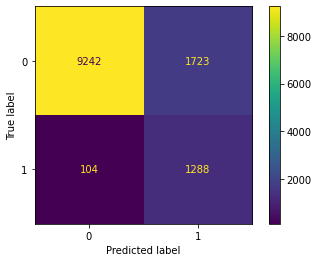

In [17]:
parameters = {'criterion': ('gini', 'entropy'), 'n_estimators': [50, 100, 150] }
rf = RandomForestClassifier()
clf = GridSearchCV(estimator=rf, param_grid=parameters, scoring=f1, n_jobs = -1)
clf.fit(X_train_under, y_train_under)

print(clf.best_params_)
print(clf.best_score_)

best_clf_rf = clf.best_estimator_
grid_predictions = best_clf_rf.predict(X_test)    
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_rf, X_test, y_test)  
plt.show()

{'criterion': 'entropy', 'n_estimators': 150}
0.9552860637318185
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10965
           1       0.60      0.59      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.77      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


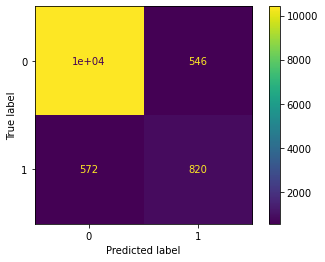

In [18]:
clf = GridSearchCV(estimator=rf, param_grid=parameters, scoring=recall, n_jobs = -1)
clf.fit(X_train_over, y_train_over)

print(clf.best_params_)
print(clf.best_score_)

best_clf_rf2 = clf.best_estimator_
grid_predictions = best_clf_rf2.predict(X_test)    
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_rf2, X_test, y_test)  
plt.show()

/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par

Accuracy score: 0.89
F1 score: 0.61
Recall score: 0.78


/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


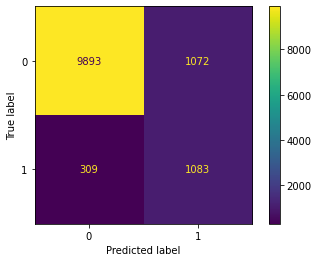

In [19]:
from sklearn.ensemble import VotingClassifier

eclf_over_soft = VotingClassifier(estimators=[
    ('svc' ,clf_svc_o), ('dt' ,clf_dt_o), ('lr' , clf_lr_o)], voting='soft')

eclf_over_soft.fit(X_train_over, y_train_over)

y_pred = eclf_over_soft.predict(X_test)

acc_sc = accuracy_score(y_test, y_pred)
print('Accuracy score: %.2f' % acc_sc)

f1_sc = f1_score(y_test, y_pred, average='binary')
print('F1 score: %.2f' % f1_sc)

recall_sc = recall_score(y_test, y_pred, average='binary')
print('Recall score: %.2f' % recall_sc)

plot_confusion_matrix(eclf_over_soft, X_test, y_test)  
plt.show()

/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio par

{'dt__criterion': 'entropy', 'lr__C': 1, 'lr__penalty': 'none', 'svc__C': 10, 'svc__gamma': 'auto'}
0.932409377515178
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10965
           1       0.51      0.72      0.60      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.82      0.77     12357
weighted avg       0.91      0.89      0.90     12357



/home/marek/Documents/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


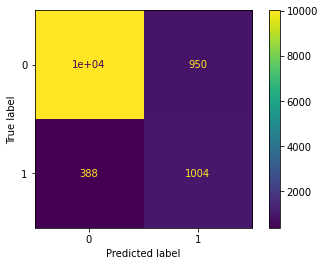

In [21]:
clf = VotingClassifier(estimators=[
    ('svc' , SVC(probability=True)), ('dt' ,DecisionTreeClassifier()), ('lr' , LogisticRegression())], voting='soft')
parameters = {'dt__criterion': ('gini', 'entropy'), 
              'lr__penalty': ('l2', 'none'), 'lr__C': [1, 10],
              'svc__C': [1, 10], 'svc__gamma':('scale', 'auto')
             }
clf = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1, n_jobs = -1)
clf.fit(X_train_over, y_train_over)

print(clf.best_params_)
print(clf.best_score_)

best_clf_vc = clf.best_estimator_
grid_predictions = best_clf_vc.predict(X_test)    
print(classification_report(y_test, grid_predictions))

plot_confusion_matrix(best_clf_vc, X_test, y_test)  
plt.show()